### Import Required Libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re,string,unicodedata
import matplotlib.pyplot as plt

### Import Dataset

In [2]:
imdb_data=pd.read_csv('Data/IMDB_Dataset.csv')

### Initialise tockeniser and stopwords

In [3]:
tokenizer=ToktokTokenizer()
stopword_list=stopwords.words('english')
stop=set(stopword_list)

### Define cleaner function

The cleaner function use Beautiful Soup html parser and removes html tags in the review. Then we use refular expression to remove brackets and special characters as these does have no effect in sentiment analysis model. Then we tokenise the reviews and convert each token to lower case letter and remove any white spaces. then we filter the tockens using the stopwords. Then we stem the tokens using nltk PorterStemmer. Stemming is the process of producing morphological variants of a root/base word.

In [4]:
def cleaner(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = re.sub(r'\[[^]]*\]', '', text)
    text = re.sub(r'[^a-zA-z\s]','',text)
    tokens = tokenizer.tokenize(text)
    tokens = [token.lower().strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    text = ' '.join(filtered_tokens)
    ps=nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

### Store Processed reviews

In [5]:
imdb_data['review']=imdb_data['review'].apply(cleaner)

imdb_data.to_csv('data/cleanedReviews.csv',index=False)

### Looking into data

In [6]:
imdb_data.head()

,review,sentiment
0,one review mention watch oz episod youll hook ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


In [7]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49577,2
top,love today show varieti sole cook would great ...,positive
freq,5,25000


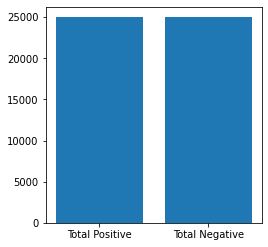

In [8]:
posCount = imdb_data[imdb_data.sentiment=="positive"]['sentiment'].count()
negCount = imdb_data[imdb_data.sentiment=="negative"]['sentiment'].count()
fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,1,1])

XAxis = ['Total Positive','Total Negative']
Height = [posCount,negCount]
ax.bar(XAxis,Height)
plt.show()